In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.array([[1,2],[1.5,1.8], [5,8],[8,8], [1,.6], [9,11]])

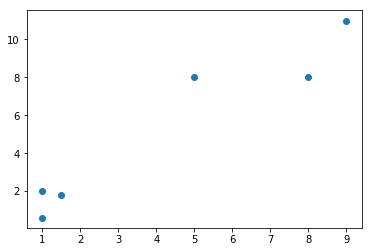

In [6]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [7]:
from sklearn.cluster import KMeans

In [14]:
k_means = KMeans(n_clusters = 3)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
k_means.labels_, k_means.cluster_centers_

(array([1, 1, 0, 0, 1, 2], dtype=int32), array([[  6.5       ,   8.        ],
        [  1.16666667,   1.46666667],
        [  9.        ,  11.        ]]))

In [20]:
a = np.array([1,2,4])
a.argmin()

0

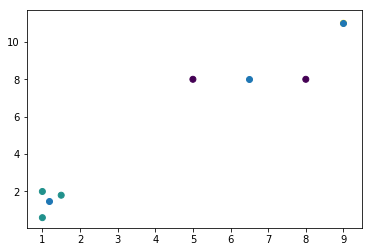

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1])
plt.show()

In [23]:
class K_Means:
    def __init__(self, k = 2, max_iter = 1000):
        self.k = k
        self.max_iter = max_iter
        
    def fit(self, data):
        self.means = []
        for i in range(self.k):
            self.means.append(data[i])
        
        for it in range(self.max_iter):
            cluster_points = []
            for i in range(self.k):
                cluster_points.append([])
            
            for point in data:
                distances = np.array([((point - m)**2).sum() for m in self.means])
                cluster_index = distances.argmin()
                cluster_points[cluster_index].append(point)
            
            change = False
            for i in range(self.k):
                new_mean = np.average(cluster_points[i], axis = 0)
                if not np.array_equal(self.means[i], new_mean):
                    change = True
                self.means[i] = new_mean
            if not change:
                break
        self.labels = self.predict(data)
    
    def predict(self, test_data):
        cluster_pred = []
        for point in test_data:
            distances = np.array([((point - m)**2).sum() for m in self.means])
            cluster_index = distances.argmin()
            cluster_pred.append(cluster_index)
        return cluster_pred

In [24]:
k_m = K_Means(k = 2)
k_m.fit(X)
k_m.labels

[0, 0, 1, 1, 0, 1]